In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


# Importing library

In [2]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,roc_curve,precision_recall_curve, roc_auc_score, balanced_accuracy_score, make_scorer,classification_report,cohen_kappa_score,confusion_matrix,auc,average_precision_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier,VotingClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler,OrdinalEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,RandomizedSearchCV, StratifiedKFold,GridSearchCV,learning_curve
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data

In [3]:
train=pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv")
sample=pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv")
test=pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv")
#clean the data or fill with it nan
train.replace(to_replace=["?", " "], value=np.nan, inplace=True)

# Analysis the data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [5]:
train.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [6]:
train.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [7]:
sample.head()

,id,Made_Purchase
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False


# Analysis the train data in terms of values

In [8]:
for column in train.columns:
  print(column,'\n''---------------------------------------\n',train[column].value_counts(),'\n\n')

HomePage 
---------------------------------------
 0.0     6977
1.0     1580
2.0     1264
3.0     1114
4.0      882
5.0      700
6.0      485
7.0      385
8.0      303
9.0      252
10.0     180
11.0     111
12.0     101
13.0      60
14.0      56
15.0      41
16.0      22
17.0      20
18.0      14
19.0       7
22.0       7
23.0       6
24.0       3
21.0       3
20.0       3
27.0       1
26.0       1
Name: HomePage, dtype: int64 


HomePage_Duration 
---------------------------------------
 0.000000      7130
4.000000        76
5.000000        62
11.000000       55
6.000000        49
              ... 
405.550000       1
101.851111       1
218.966667       1
291.235714       1
168.700000       1
Name: HomePage_Duration, Length: 2844, dtype: int64 


LandingPage 
---------------------------------------
 0.0     11525
1.0      1206
2.0       859
3.0       452
4.0       239
5.0       119
6.0        89
7.0        40
8.0        13
9.0        12
10.0        9
12.0        5
13.0        4
14.0  

# Analysis the train data using barcharts

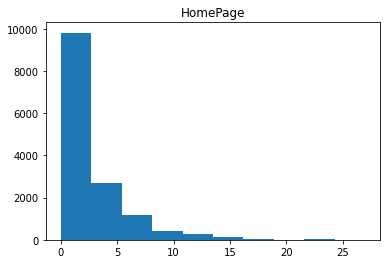

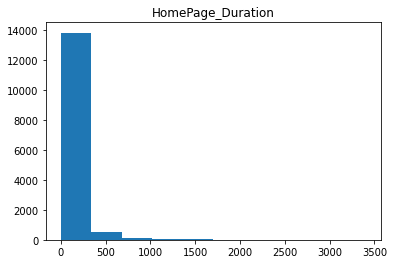

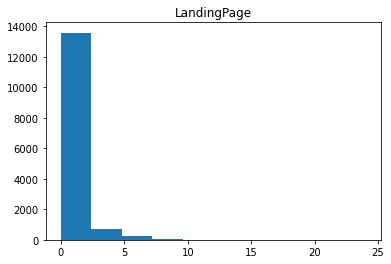

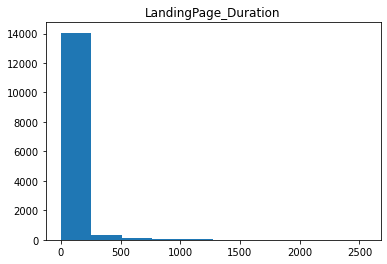

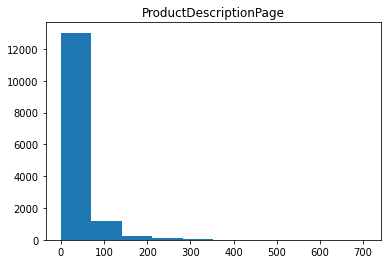

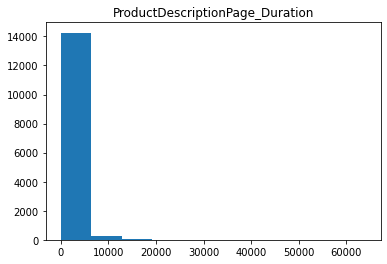

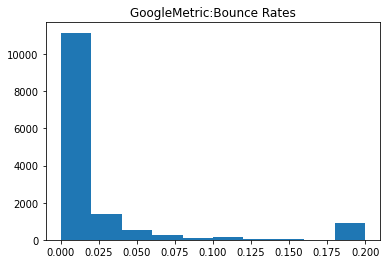

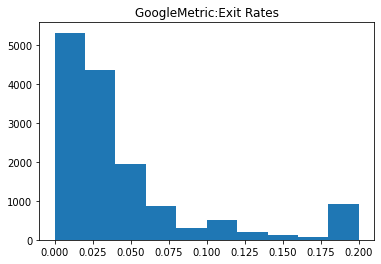

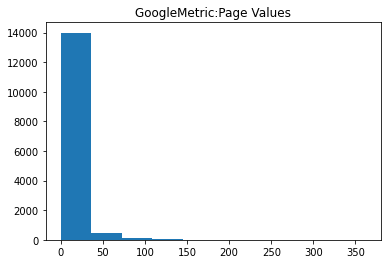

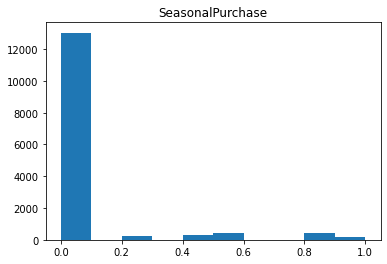

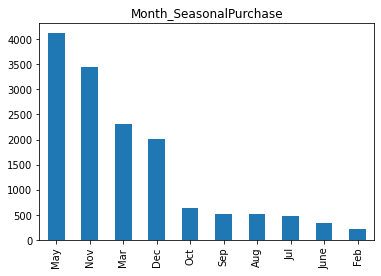

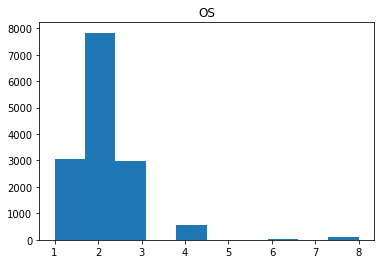

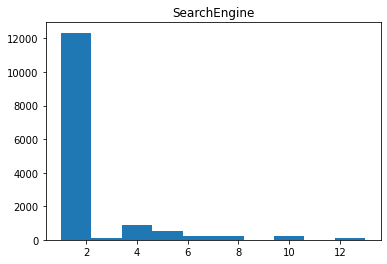

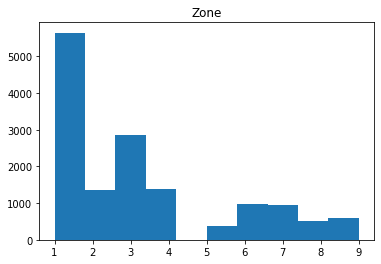

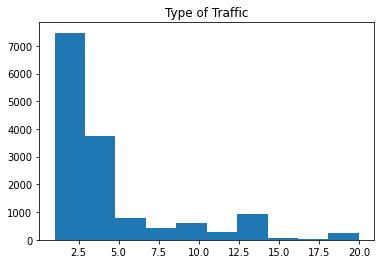

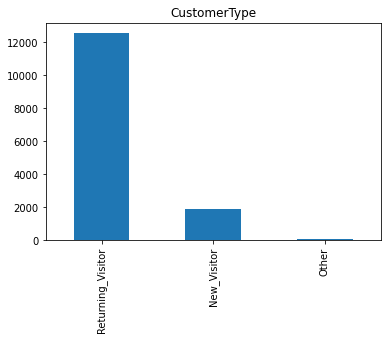

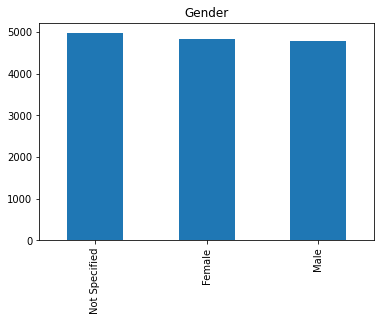

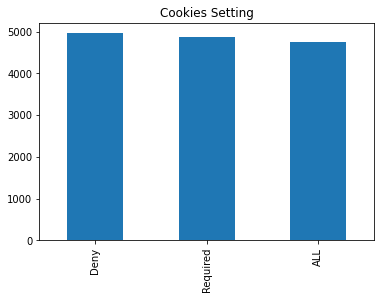

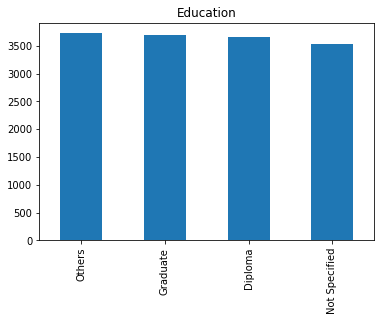

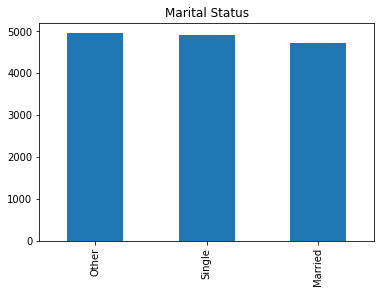

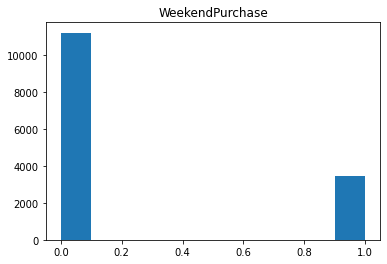

In [9]:

for column in train.columns:
    
    # If the column is numeric, plot a histogram
    if train[column].dtype in ['int64', 'float64']:
        plt.hist(train[column].dropna())
        plt.title(column)
        plt.show()
        
    # If the column is categorical, plot a bar chart
    elif train[column].dtype == 'object':
        train[column].value_counts().plot(kind='bar')
        plt.title(column)
        plt.show()


# Calculating the number of nan values

In [10]:
train.isna().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

# Compute the correlation matrix

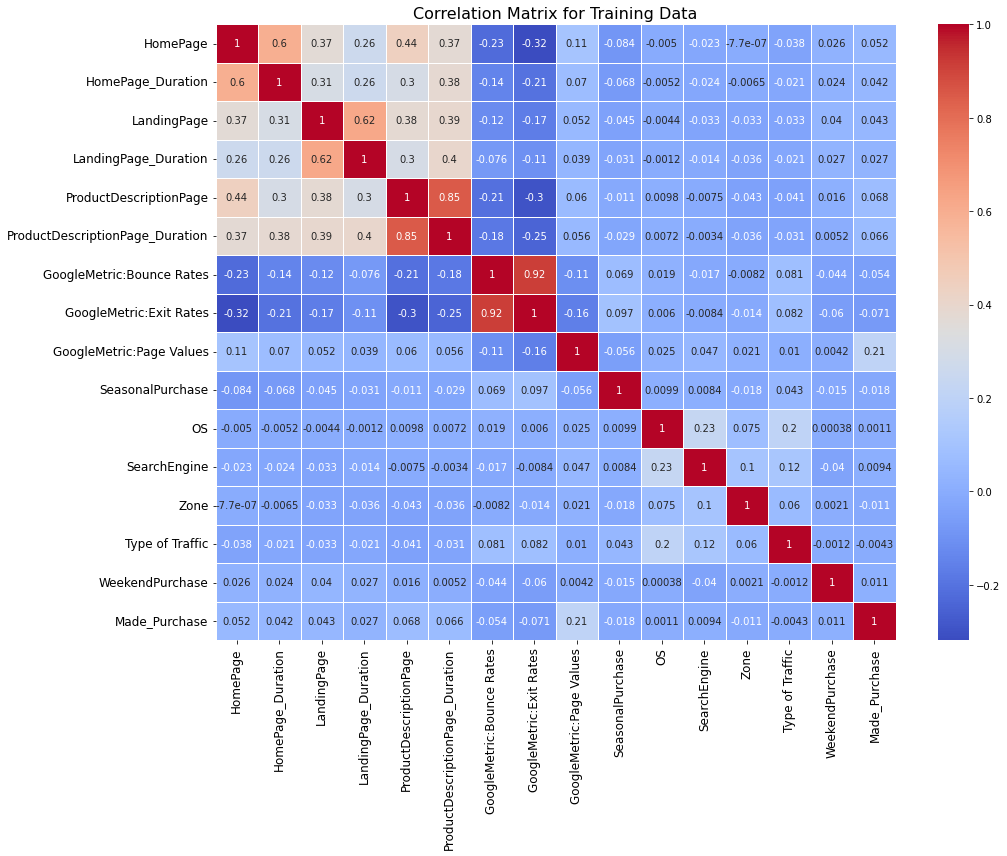

In [11]:
corr_matrix = train.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Correlation Matrix for Training Data", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [12]:
corr_matrix['Made_Purchase']

HomePage                           0.052235
HomePage_Duration                  0.042043
LandingPage                        0.042832
LandingPage_Duration               0.027151
ProductDescriptionPage             0.068328
ProductDescriptionPage_Duration    0.066225
GoogleMetric:Bounce Rates         -0.053724
GoogleMetric:Exit Rates           -0.071258
GoogleMetric:Page Values           0.205206
SeasonalPurchase                  -0.017940
OS                                 0.001111
SearchEngine                       0.009360
Zone                              -0.011090
Type of Traffic                   -0.004270
WeekendPurchase                    0.010922
Made_Purchase                      1.000000
Name: Made_Purchase, dtype: float64

# Define numerical and categorical features

In [13]:
#train.select_dtypes(include=['int64','float64']).columns
numerical_features =['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase', 'OS', 'SearchEngine',
       'Zone', 'Type of Traffic', 'WeekendPurchase']
#train.select_dtypes(include=['object']).columns
categorical_features = ['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status']


# Split data into input (X) and output (y) variables

In [14]:
X = train.drop('Made_Purchase', axis=1)
y = train['Made_Purchase']

# Split data into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resample the training set


In [16]:
oversample = RandomOverSampler(sampling_strategy=0.9)
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Preprocessing pipeline


In [17]:
numerical_transformer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=9, add_indicator=True)),
    ('scaler', MinMaxScaler()),
])

categorical_transformer = Pipeline([
      ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define ensemble model and fit 

In [18]:
# Define ensemble model using VotingClassifier
model = Pipeline([
    ('preprocessing', preprocessor),
    ('voting', VotingClassifier(estimators=[
    ('gb', GradientBoostingClassifier()),
    ('ab', AdaBoostClassifier())], voting='soft'))
])


# Hyperparameter tuning using RandomizedSearchCV with cross-validation and regularization
param_distributions = {
    'voting__gb__n_estimators': [50, 100, 200,300],
    'voting__gb__learning_rate': [0.001, 0.01, 0.1],
    'voting__ab__n_estimators': [50, 100, 200,300],
    'voting__ab__learning_rate': [0.0001,0.001, 0.01, 0.1,1],
}

scoring = {
    'f1': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score)
}
cv = StratifiedKFold(n_splits=25, shuffle=True, random_state=42)
search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=cv, scoring=scoring,refit='precision', n_jobs=-1)

# Get the best estimator
search.fit(X_resampled, y_resampled)
# Get the best estimator
best_model = search.best_estimator_

In [19]:
best_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(add_indicator=True,
                                                                              n_neighbors=9)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['HomePage',
                                                   'HomePage_Duration',
                                                   'LandingPage',
                                                   'LandingPage_Duration',
                                                   'ProductDescriptionPage',
                                                   'ProductDescriptionPage_Duration',
                                    

# Make predictions on the  X_test


In [20]:
y_pred = best_model.predict(X_test)

## Analysis best hyperparameters and best scores

In [21]:
print("Best hyperparameters: \n", search.best_params_,'\n')
print("Best score: ", search.best_score_,'\n\n')

Best hyperparameters: 
 {'voting__gb__n_estimators': 100, 'voting__gb__learning_rate': 0.001, 'voting__ab__n_estimators': 100, 'voting__ab__learning_rate': 1} 

Best score:  0.8272850833530064 




# Various analysis on prediction of the X_test data 

## Calculate the confusion matrix

<AxesSubplot:>

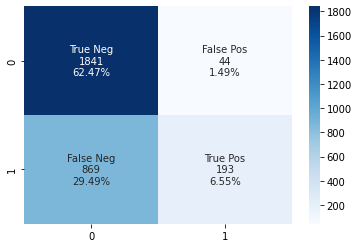

In [22]:
c = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in c.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in c.flatten()/np.sum(c)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(c, annot=labels, fmt='', cmap='Blues')

## Classification report

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.68      0.98      0.80      1885
        True       0.81      0.18      0.30      1062

    accuracy                           0.69      2947
   macro avg       0.75      0.58      0.55      2947
weighted avg       0.73      0.69      0.62      2947



## Print the various scores

In [24]:
# Calculate precision, recall, accuracy, and F1 score 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate the ROC curve and ROC AUC score 
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
# Calculate the Kappa score 
kappa = cohen_kappa_score(y_test, y_pred)
# Calculate the average precision score 
avg_precision = average_precision_score(y_test, y_pred_prob)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)


print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 score:", f1)
print("ROC AUC Score:", roc_auc)
print("Balanced accuracy score:", balanced_accuracy)
print("Average Precision Score:", avg_precision)
print("Kappa score:", kappa)

Precision: 0.8143459915611815
Recall: 0.1817325800376648
Accuracy: 0.6901934170342722
F1 score: 0.29715165511932257
ROC AUC Score: 0.6468874102713964
Balanced accuracy score: 0.5791952024856759
Average Precision Score: 0.5715503206289685
Kappa score: 0.190736488142771


## precision-recall curve

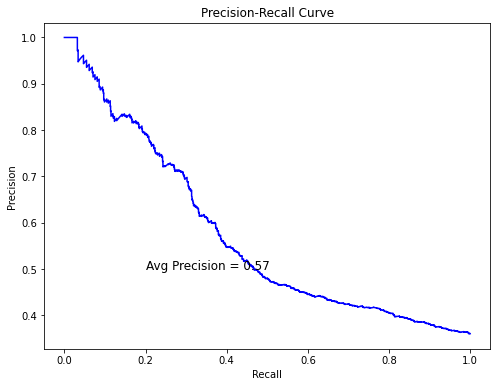

In [25]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Add the average precision score to the plot
avg_precision = average_precision_score(y_test, y_pred_prob)
plt.text(0.2, 0.5, 'Avg Precision = {:.2f}'.format(avg_precision), fontsize=12)

plt.show()

## ROC curve

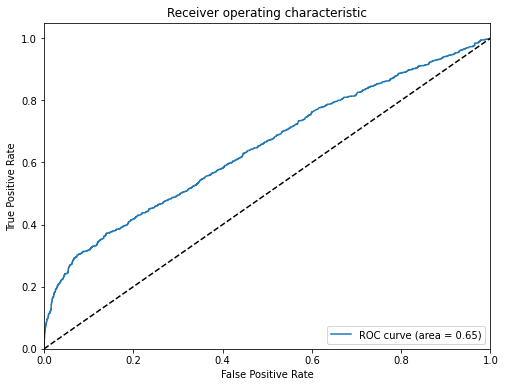

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Make predictions on the test data


In [27]:
y_test_pred = best_model.predict(test)
y_test_pred = y_test_pred.astype(bool)


submission=pd.DataFrame(columns=['id', 'Made_Purchase'])
submission['id']=[i for i in range(len(y_test_pred))]
submission["Made_Purchase"]=y_test_pred
submission.to_csv('submission.csv',index=False)


# Calculate accuracy on submission

In [28]:
y_test_true = sample['Made_Purchase']
accuracy = accuracy_score(y_test_true, y_test_pred)
print("Accuracy on test data:", accuracy)


Accuracy on test data: 0.9140778905894833
